# Importing Libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [34]:
df = pd.read_csv('swiggy.csv')

# Data Cleaning

In [35]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

In [36]:
columns_required = ['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine']
df = df[columns_required]

In [37]:
df.head()

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food"


In [38]:
# Tells the number of rows and columns and the dataset
df.shape

(148541, 6)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          148455 non-null  object
 1   city          148541 non-null  object
 2   rating        148455 non-null  object
 3   rating_count  148455 non-null  object
 4   cost          148410 non-null  object
 5   cuisine       148442 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


In [65]:
# Checking missing values
# df.isna().sum()
df.isna().sum() / len(df) * 100

name            0.057896
city            0.000000
rating          0.057896
rating_count    0.057896
cost            0.088191
cuisine         0.066648
dtype: float64

In [41]:
# Copying the dataset
df1 = df.copy()

In [42]:
# Dropping the rows with null values

df1.dropna(subset=['rating'], inplace=True)
df1.dropna(subset=['cost'], inplace=True)
df1.dropna(subset=['cuisine'], inplace=True)

In [43]:
# checking the null values again
df1.isna().sum()

name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [44]:
# Replacing -- in rating to 0
df1['rating'] = df1['rating'].str.replace('--', '0')

# Replacing empty cost to 0
df1['cost'] = df1['cost'].str.replace('₹', '')

# Replacing K to 000 and Too Few Ratings to 0
df1['rating_count'] = df1['rating_count'].str.replace('+','').str.replace('K','000').str.replace('Too Few Ratings', '0').str.replace('ratings', '')

In [45]:
df1.head()

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,0,0,200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50,200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100,100,Beverages
3,Singh Hut,Abohar,3.7,20,250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,0,0,250,"Italian-American,Fast Food"


In [46]:
# Checking outliers for rating column
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df1['rating'])
# plt.title("Box Plot of Ratings")
# plt.show()

In [47]:
# Correcting the datatype
df1['rating'] = df1['rating'].astype(float)
df1['rating_count'] = df1['rating_count'].astype(int)
df1['cost'] = df1['cost'].astype(int)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148398 entries, 0 to 148540
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          148398 non-null  object 
 1   city          148398 non-null  object 
 2   rating        148398 non-null  float64
 3   rating_count  148398 non-null  int32  
 4   cost          148398 non-null  int32  
 5   cuisine       148398 non-null  object 
dtypes: float64(1), int32(2), object(3)
memory usage: 6.8+ MB


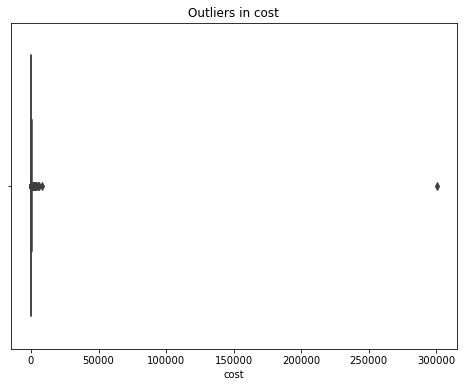

In [49]:
# Detecting outliers
plt.figure(figsize = (8,6))
sns.boxplot(df1["cost"])
plt.title("Outliers in cost")
plt.show()

In [50]:
# Handling outliers
df1 = df1.drop(df1[df1['cost']>10000].index)

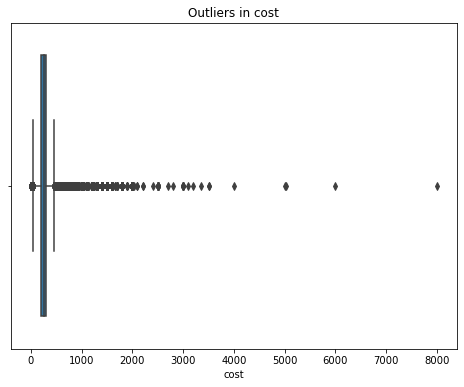

In [51]:
# Outliers handled
plt.figure(figsize = (8,6))
sns.boxplot(df1["cost"])
plt.title("Outliers in cost")
plt.show()

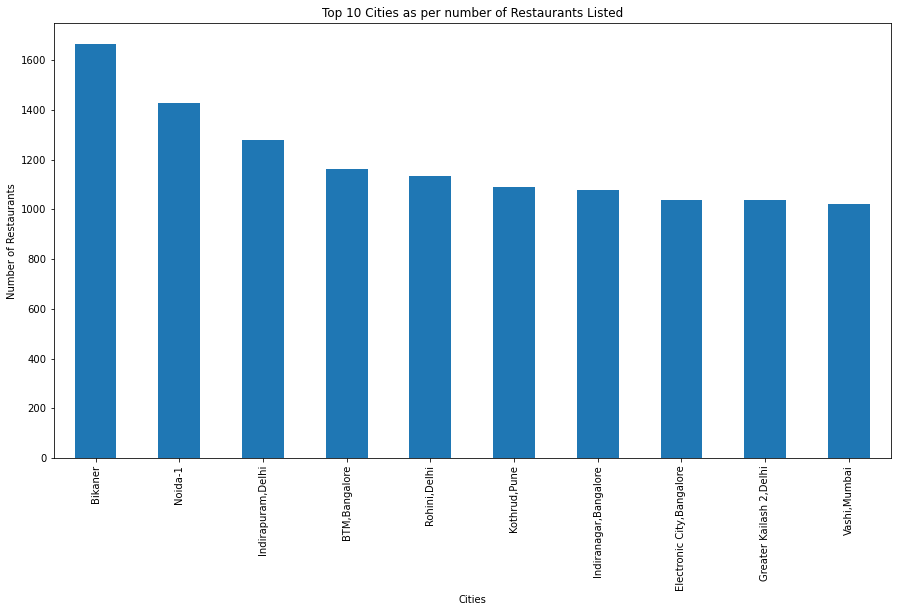

In [52]:
# Checking the top 10 cities with the highest number of restaurant
top_restaurant = df1.groupby('city')['name'].count().sort_values(ascending=False)
plt.figure(figsize=(15,8))
top_restaurant.head(10).plot.bar()
plt.title('Top 10 Cities as per number of Restaurants Listed')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.show()

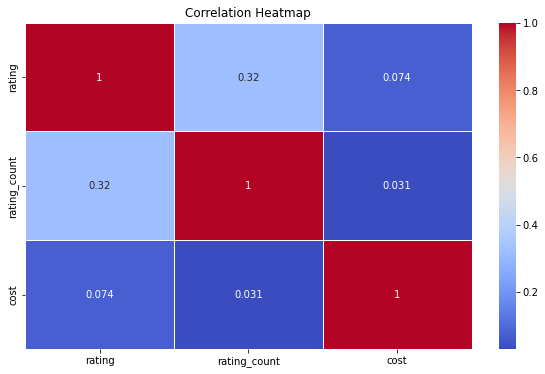

In [53]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

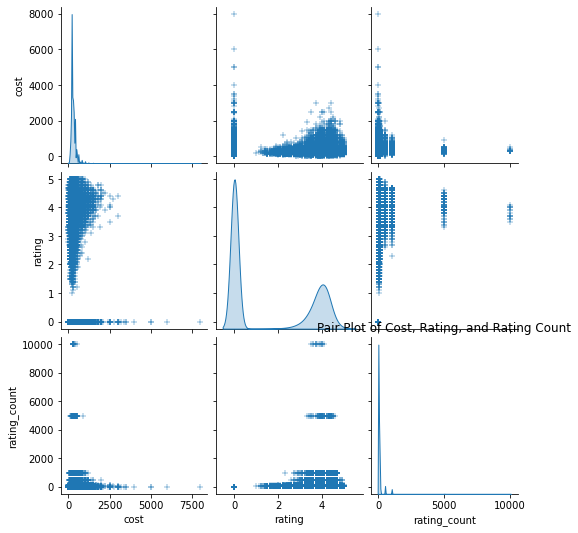

In [54]:
# Pair plot for multivariate relationships
sns.pairplot(df1[['cost', 'rating', 'rating_count']], diag_kind='kde', markers='+', palette='husl')
plt.title("Pair Plot of Cost, Rating, and Rating Count")
plt.show()


In [55]:
# #  Multivariate Box Plot by City
# plt.figure(figsize=(15,8))
# sns.boxplot(x='city', y='cost', data=df1, palette='Set2')
# plt.title("Restaurant Cost Distribution by City")
# plt.xticks(rotation=90)
# plt.show()

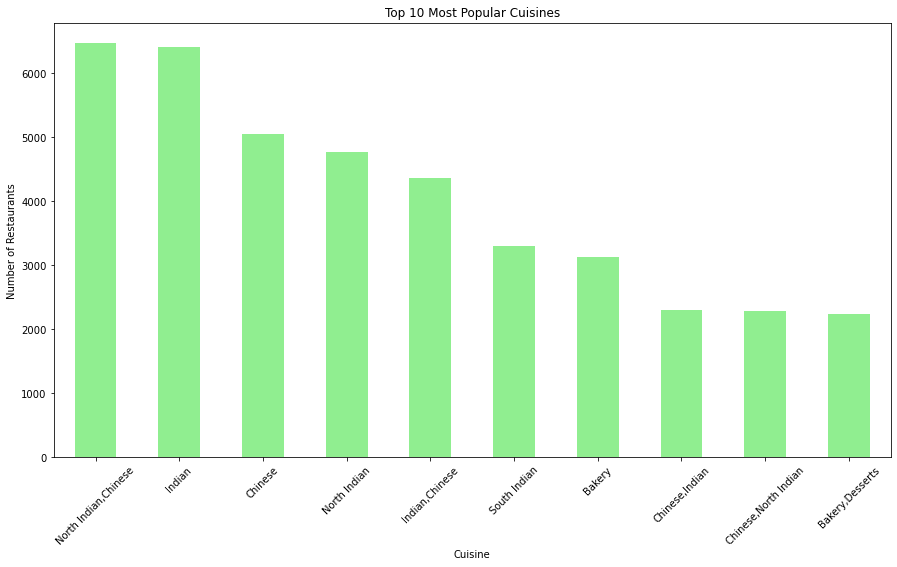

In [56]:
# 2. Identifying the most popular cuisines in the dataset

top_cuisines = df1['cuisine'].value_counts().head(10)
plt.figure(figsize=(15, 8))
top_cuisines.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

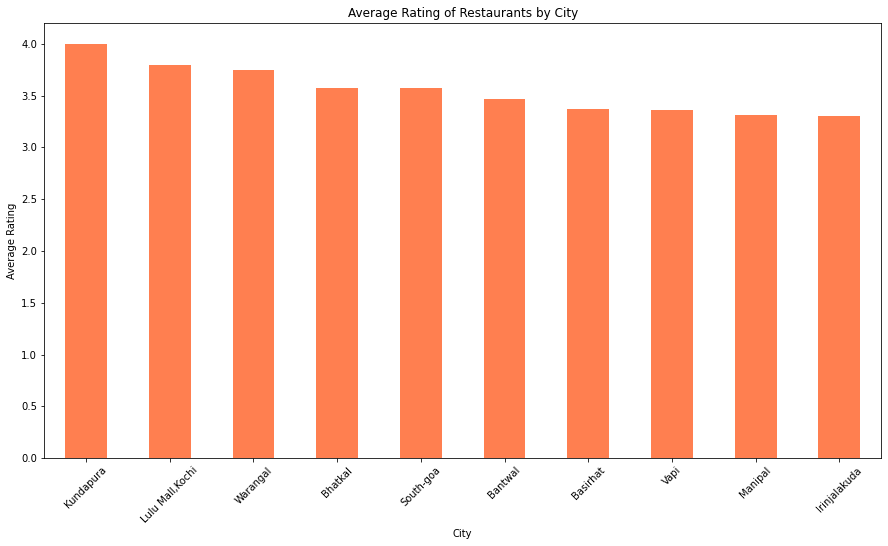

In [57]:
# 3. Finding the average rating of restaurants across all cities

avg_rating = df1.groupby('city')['rating'].mean()
plt.figure(figsize=(15, 8))
avg_rating.sort_values(ascending=False).head(10).plot.bar(color='coral')
plt.title('Average Rating of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [58]:
# 4. Checking the distribution of restaurant ratings (rating > 5)

rating_outliers = df1[df1['rating'] > 5]
if not rating_outliers.empty:
    print("Outliers detected in the rating column")
else:
    print("No outliers detected")

No outliers detected


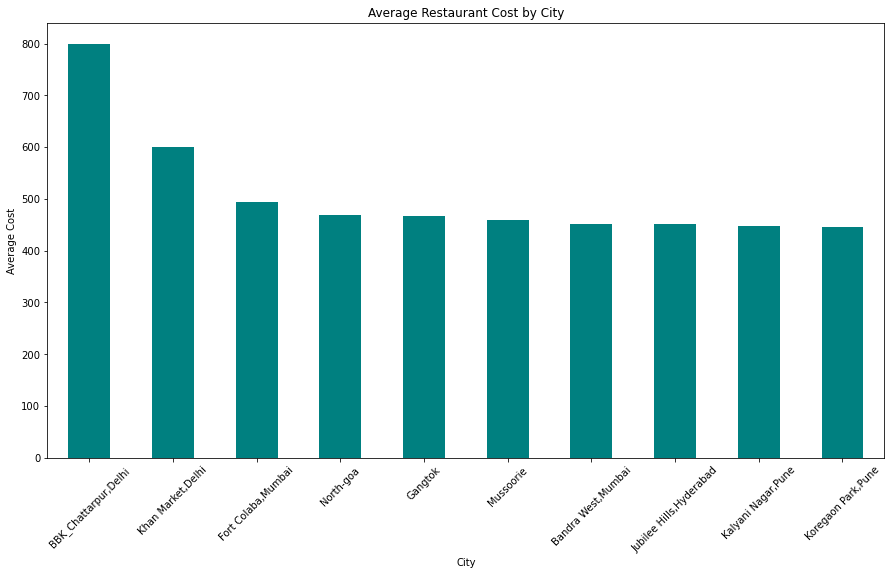

In [59]:
# 5. Checking the distribution of restaurant costs by city

city_cost_distribution = df1.groupby('city')['cost'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
city_cost_distribution.head(10).plot.bar(color='teal')
plt.title('Average Restaurant Cost by City')
plt.xlabel('City')
plt.ylabel('Average Cost')
plt.xticks(rotation=45)
plt.show()

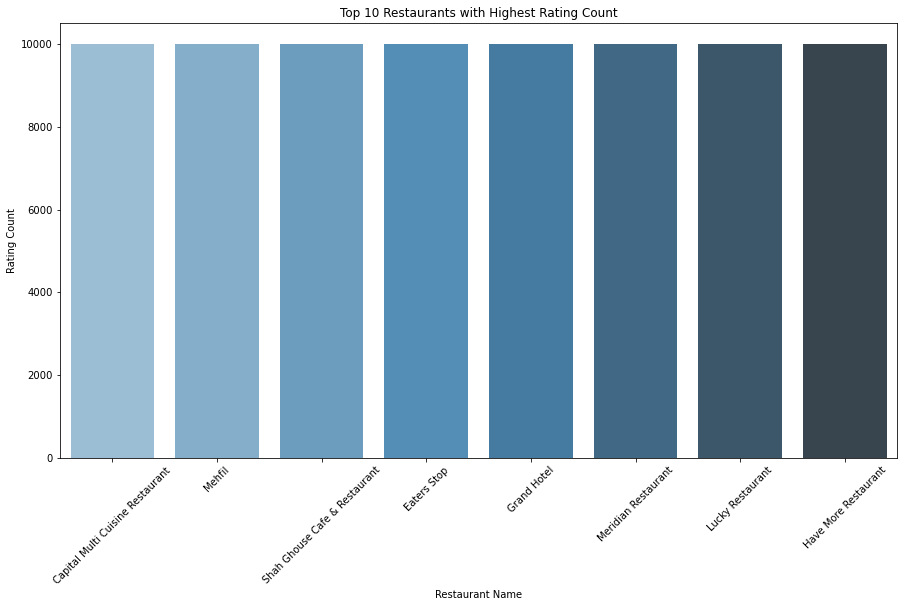

In [60]:
# 6. Finding the top 10 restaurants with the highest rating count

top_rated_restaurants = df1.sort_values(by='rating_count', ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(x='name', y='rating_count', data=top_rated_restaurants, palette='Blues_d')
plt.title('Top 10 Restaurants with Highest Rating Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Rating Count')
plt.xticks(rotation=45)
plt.show()

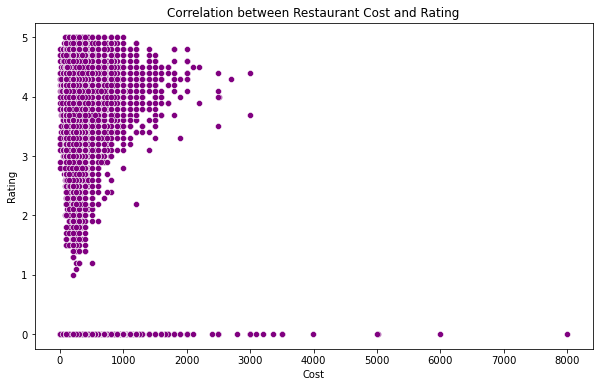

In [61]:
# 7. Checking the correlation between restaurant cost and rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='rating', data=df1, color='purple')
plt.title('Correlation between Restaurant Cost and Rating')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.show()

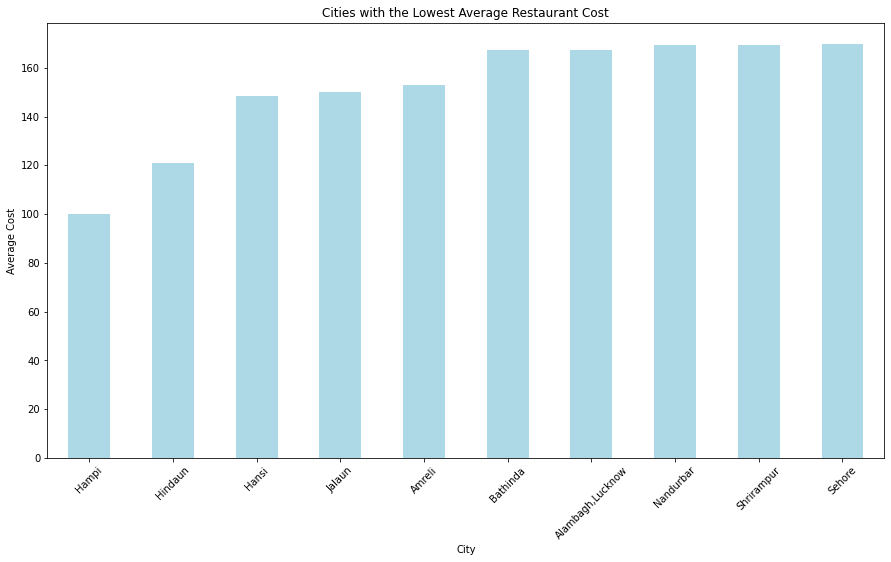

In [62]:
# 8. Identifying cities with the lowest average restaurant cost

lowest_cost_cities = df1.groupby('city')['cost'].mean().sort_values().head(10)
plt.figure(figsize=(15, 8))
lowest_cost_cities.plot.bar(color='lightblue')
plt.title('Cities with the Lowest Average Restaurant Cost')
plt.xlabel('City')
plt.ylabel('Average Cost')
plt.xticks(rotation=45)
plt.show()

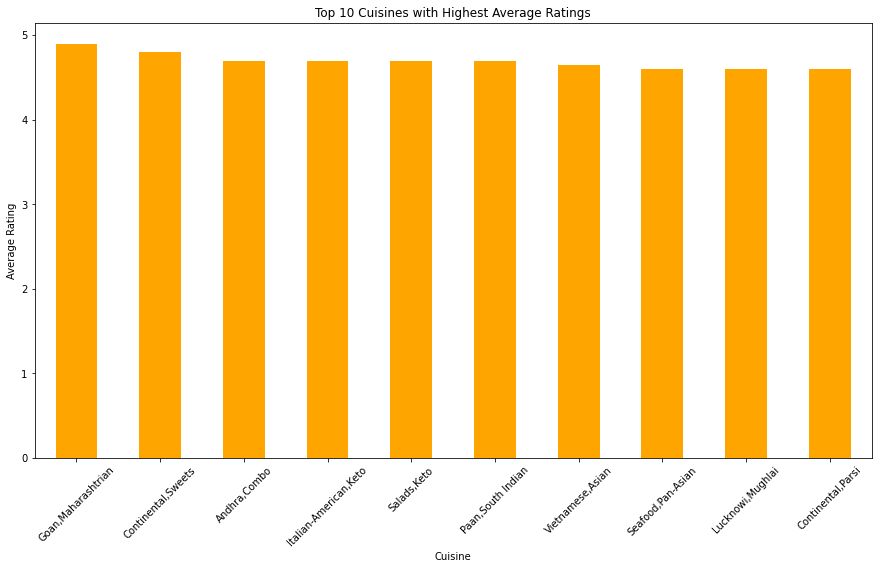

In [63]:
# 10. Analyzing the distribution of ratings across different cuisines

cuisine_rating_distribution = df1.groupby('cuisine')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
cuisine_rating_distribution.head(10).plot.bar(color='orange')
plt.title('Top 10 Cuisines with Highest Average Ratings')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()